In [3]:
from util._io import read_config
from collections import namedtuple
from pathlib import Path
import pandas as pd
import numpy as np

import fastsca

import _pnmf,_dcpnmf,_dcpnmfb,_dcpnmfv2
np.random.seed(42)

import matplotlib.pylab as plt
import seaborn as sns
import colorcet as cc
import _topics_util


experiment = '/projects/experiments/asapp/'
server = Path.home().as_posix()
experiment_home = server+experiment
experiment_config = read_config(experiment_home+'config.yaml')
args = namedtuple('Struct',experiment_config.keys())(*experiment_config.values())

sca = fastsca.FASTSCA()
sca.config = args
sca.initdata()
fn = sca.config.home + sca.config.experiment +sca.config.output + sca.config.sample_id+'/'+sca.config.sample_id

In [4]:
df_bd = pd.read_csv(fn+'_depth.csv.gz')
df_bf = pd.read_csv(fn+'_freq.csv.gz')
df_bbeta = pd.read_csv(fn+'_beta.csv.gz')
df_btheta = pd.read_csv(fn+'_theta.csv.gz')

df_scd = pd.read_csv(fn+'_sc_depth.csv.gz')
df_scf = pd.read_csv(fn+'_sc_freq.csv.gz')
df_scbeta = pd.read_csv(fn+'_sc_beta.csv.gz')
df_sctheta = pd.read_csv(fn+'_sc_theta.csv.gz')
df_btheta = df_btheta.rename(columns={'Unnamed: 0':'cell'})
df_bbeta = df_bbeta.rename(columns={'Unnamed: 0':'topic'})
df_sctheta = df_sctheta.rename(columns={'Unnamed: 0':'cell'})
df_scbeta = df_scbeta.rename(columns={'Unnamed: 0':'topic'})

df_bulk_b = pd.read_csv(fn+'_bulk_trace.csv.gz')
df_sc_b = pd.read_csv(fn+'_sc_bulk_trace.csv.gz')
df_scbulk_b = pd.read_csv(fn+'_sc_trace.csv.gz')


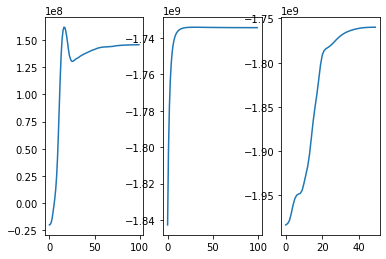

In [3]:
figure,axis = plt.subplots(1,3)
axis[0].plot(df_bulk_b.iloc[:,1].values)
axis[1].plot(df_scbulk_b.iloc[:,1].values)
axis[2].plot(df_sc_b.iloc[:,1].values)

In [8]:
df_pl = pd.read_csv(sca.config.home + sca.config.experiment +sca.config.output + sca.config.sample_id+'/'+sca.config.sample_id+'_prior_label.csv.gz')
df_pl.columns = ['cell','cell_type']
df_pl

,cell,cell_type
0,CID3586_AAGACCTCAGCATGAG,Endothelial
1,CID3586_AAGGTTCGTAGTACCT,Endothelial
2,CID3586_ACCAGTAGTTGTGGCC,Endothelial
3,CID3586_ACCCACTAGATGTCGG,Endothelial
4,CID3586_ACTGATGGTCAACTGT,Endothelial
...,...,...
100059,CID4398_TCAGGTAGTACTCAAC,Myeloid
100060,CID4398_TCTATTGTCGCCATAA,Myeloid
100061,CID4398_TCTTTCCCAGTAAGCG,Myeloid
100062,CID4398_TGCCCATGTTACGGAG,Myeloid


In [5]:
import umap

# df_umap= pd.DataFrame()
# df_umap['cell'] = df_sctheta['cell']
# df_umap['topic_sc'] = [x for x in df_sctheta.iloc[:,1:].idxmax(axis=1)]
# df_umap['topic_bulk'] = [x for x in df_btheta.iloc[:,1:].idxmax(axis=1)]

# umap_2d = umap.UMAP(n_components=2, init='random', random_state=0,min_dist=0.0,metric='cosine')
# proj_2d = umap_2d.fit(df_sctheta.iloc[:,1:])
# df_umap[['umap1','umap2']] = umap_2d.embedding_[:,[0,1]]
# df_umap

df_umap = pd.read_csv(sca.config.home + sca.config.experiment +sca.config.output + sca.config.sample_id+'/'+sca.config.sample_id+'_sc_umap.csv')
df_umap = df_umap.rename(columns={'Unnamed: 0':'cell','V1':'umap1','V2':'umap2'})
df_umap['topic_sc'] = [x for x in df_sctheta.iloc[:,1:].idxmax(axis=1)]
df_umap['topic_bulk'] = [x for x in df_btheta.iloc[:,1:].idxmax(axis=1)]

df_umap

,cell,umap1,umap2,topic_sc,topic_bulk
0,CID3586_AAGACCTCAGCATGAG,-6.434021,-8.326559,4,6
1,CID3586_AAGGTTCGTAGTACCT,-5.774728,-8.612617,4,6
2,CID3586_ACCAGTAGTTGTGGCC,-5.735215,-8.406620,4,6
3,CID3586_ACCCACTAGATGTCGG,-5.787925,-8.516517,4,6
4,CID3586_ACTGATGGTCAACTGT,-8.323321,-9.292438,4,6
...,...,...,...,...,...
100059,CID4398_TCAGGTAGTACTCAAC,0.923803,0.487602,0,8
100060,CID4398_TCTATTGTCGCCATAA,-6.480211,4.293941,6,5
100061,CID4398_TCTTTCCCAGTAAGCG,-6.364000,5.683453,0,5
100062,CID4398_TGCCCATGTTACGGAG,-6.349754,4.568035,6,5


In [9]:
df_umap = pd.merge(df_umap,df_pl[['cell','cell_type']],on='cell',how='left')
df_umap = df_umap[~df_umap['cell_type'].isna()]
df_umap

,cell,umap1,umap2,topic_sc,topic_bulk,cell_type
0,CID3586_AAGACCTCAGCATGAG,-6.434021,-8.326559,4,6,Endothelial
1,CID3586_AAGGTTCGTAGTACCT,-5.774728,-8.612617,4,6,Endothelial
2,CID3586_ACCAGTAGTTGTGGCC,-5.735215,-8.406620,4,6,Endothelial
3,CID3586_ACCCACTAGATGTCGG,-5.787925,-8.516517,4,6,Endothelial
4,CID3586_ACTGATGGTCAACTGT,-8.323321,-9.292438,4,6,Endothelial
...,...,...,...,...,...,...
100059,CID4398_TCAGGTAGTACTCAAC,0.923803,0.487602,0,8,Myeloid
100060,CID4398_TCTATTGTCGCCATAA,-6.480211,4.293941,6,5,Myeloid
100061,CID4398_TCTTTCCCAGTAAGCG,-6.364000,5.683453,0,5,Myeloid
100062,CID4398_TGCCCATGTTACGGAG,-6.349754,4.568035,6,5,Myeloid


In [23]:
df_umap.cell_type.value_counts()

T-cells              35214
Cancer Epithelial    24489
Myeloid               9675
Endothelial           7605
CAFs                  6573
PVL                   5423
Normal Epithelial     4355
Plasmablasts          3524
B-cells               3206
Name: cell_type, dtype: int64

Text(0.5, 1.0, 'bulkNMF')

<Figure size 1200x800 with 0 Axes>

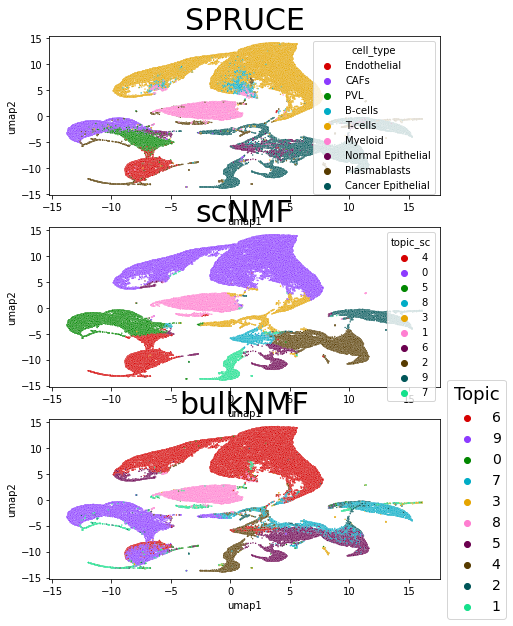

In [13]:
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)

figure,axis = plt.subplots(3,1)


cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['cell_type'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='cell_type',s=2,palette=cp,legend=True,ax=axis[0])
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("SPRUCE",fontsize=30)


cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['topic_sc'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='topic_sc',s=2,palette=cp,legend=True,ax=axis[1])
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("scNMF",fontsize=30)

cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['topic_bulk'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='topic_bulk',s=2,palette=cp,legend=True,ax=axis[2])
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("bulkNMF",fontsize=30)


Text(69.0, 0.5, 'bulk')

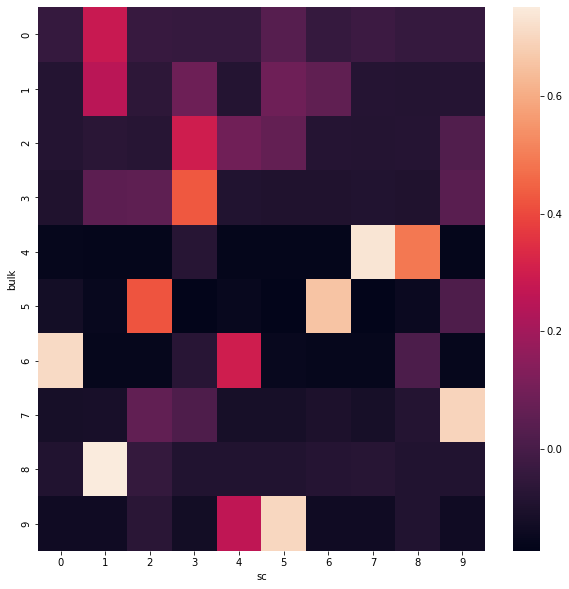

In [16]:
sel_top_genes = list(np.unique(_topics_util.get_topic_top_genes(df_scbeta.iloc[:,1:],top_n=10)['Gene'].values))
K=10
corr=[]
for i in range(K):
    cr = []
    for j in range(K):
        cr.append(np.corrcoef(df_bbeta.loc[i,sel_top_genes],df_scbeta.loc[j,sel_top_genes])[0,1])
    corr.append(cr)
sns.heatmap(corr)
plt.xlabel('sc')
plt.ylabel('bulk')

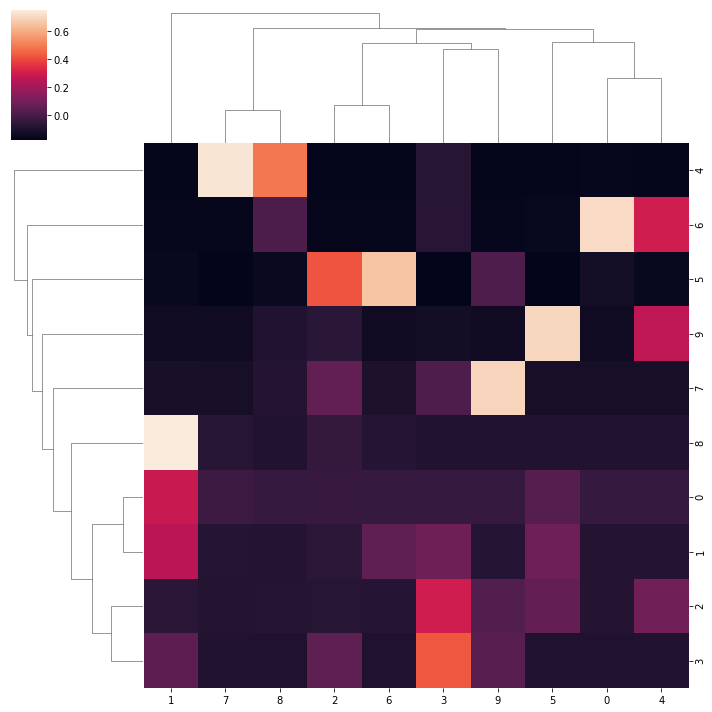

In [17]:
sns.clustermap(corr)

Text(69.0, 0.5, 'bulk')

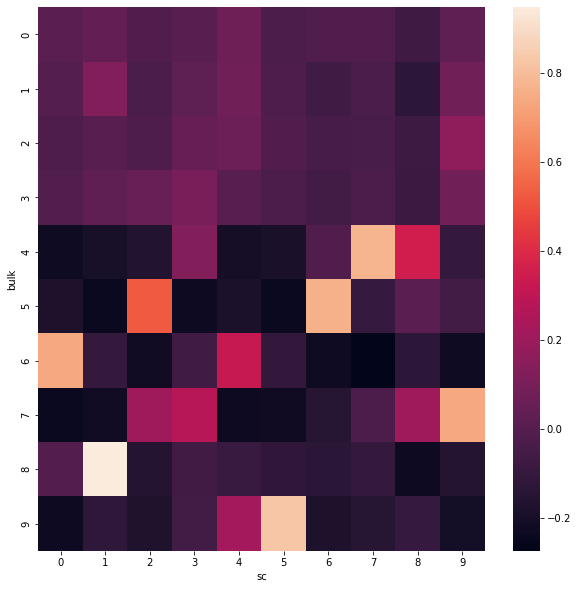

In [18]:
corr=[]
for i in range(K):
    cr = []
    for j in range(K):
        cr.append(np.corrcoef(df_bbeta.iloc[i,1:],df_scbeta.iloc[j,1:])[0,1])
    corr.append(cr)
sns.heatmap(corr)
plt.xlabel('sc')
plt.ylabel('bulk')

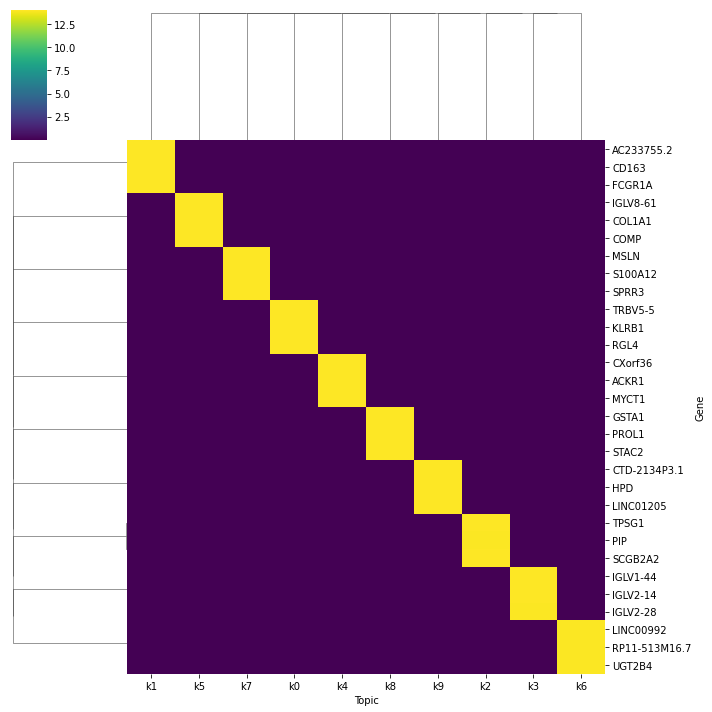

In [19]:
df_top = _topics_util.get_topic_top_genes(df_scbeta,top_n=3)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')

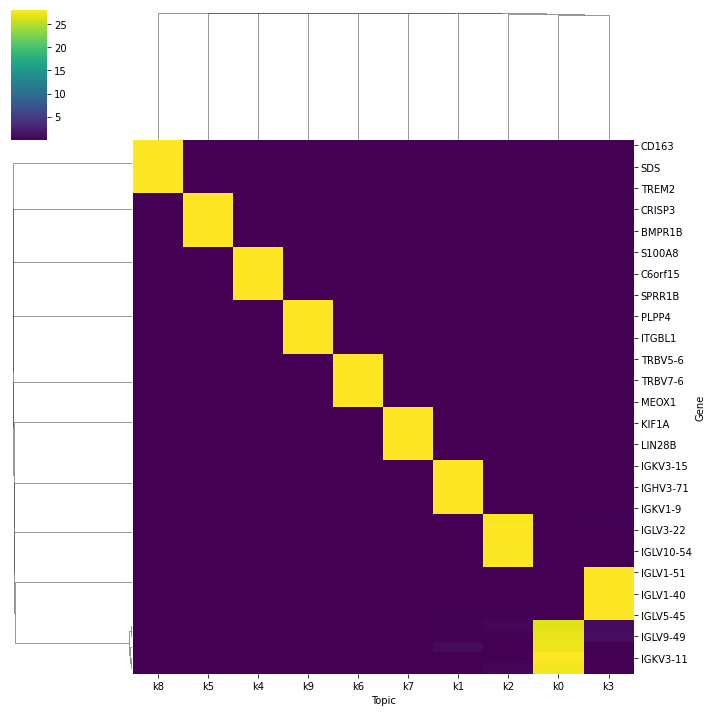

In [20]:
df_top = _topics_util.get_topic_top_genes(df_bbeta,top_n=5)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')

Text(69.0, 0.5, 'bulk')

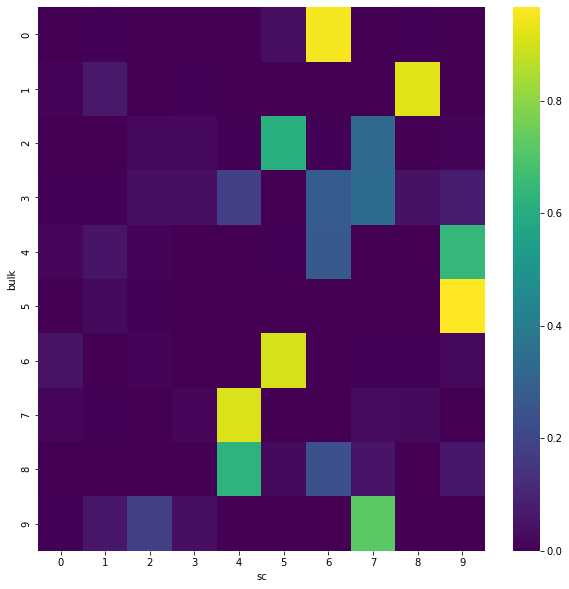

In [21]:
from sklearn.metrics.cluster import contingency_matrix
df_rmatch = pd.DataFrame(contingency_matrix(df_umap.topic_sc,df_umap.topic_bulk))
# df_rmatch = pd.DataFrame(contingency_matrix(df_umap.topic_sc_ct,df_umap.topic_blk_ct))
df_rmatch = df_rmatch.div(df_rmatch.sum(axis=1), axis=0)
sns.heatmap(df_rmatch,cmap='viridis')
plt.xlabel('sc')
plt.ylabel('bulk')


In [24]:
df_grp = df_umap.groupby(['topic_sc','cell_type'])['cell_type'].size().rename('count').reset_index()
celltype_sum = dict(df_grp.groupby('topic_sc')['count'].sum())
df_grp['ncount'] = [x/celltype_sum[y] for x,y in zip(df_grp['count'],df_grp['topic_sc'])]
df_grp = df_grp.rename(columns={'topic_sc':'topic'})
df_grp['topic'] =  df_grp['topic'].astype(int)
df_grp.to_csv(fn+'_r1_topic_sc_ct_dist.csv.gz',index=False, compression='gzip')

df_grp = df_umap.groupby(['topic_bulk','cell_type'])['cell_type'].size().rename('count').reset_index()
celltype_sum = dict(df_grp.groupby('topic_bulk')['count'].sum())
df_grp['ncount'] = [x/celltype_sum[y] for x,y in zip(df_grp['count'],df_grp['topic_bulk'])]
df_grp = df_grp.rename(columns={'topic_bulk':'topic'})
df_grp['topic'] =  df_grp['topic'].astype(int)

bulk_to_sc={
0:4,
1:2,
2:8,
3:3,
4:7,
5:6,
6:0,
7:9,
8:1,
9:5
}

df_grp['topic'] = [bulk_to_sc[x] for x in df_grp['topic']]
df_grp.to_csv(fn+'_r1_topic_bulk_ct_dist.csv.gz',index=False, compression='gzip')


In [50]:
df_grp

,topic,cell_type,count,ncount
0,0,B-cells,79,0.008236
1,0,CAFs,21,0.002189
2,0,Cancer Epithelial,39,0.004066
3,0,Endothelial,25,0.002606
4,0,Myeloid,8736,0.910759
...,...,...,...,...
82,9,Myeloid,734,0.024423
83,9,Normal Epithelial,1716,0.057097
84,9,PVL,6,0.000200
85,9,Plasmablasts,600,0.019964
